# Seoul Bike Data
## Notebook project made by CHMIEL Audrey and DONIER Marie 
### PROMO 2023 - DIA 1

### Table of Contents

* [0. Importation of the libraries](#0.)
* [1. Importation of the dataset](#1.)
* [2. Exploration of the dataset](#2.)
* [3. Data Cleaning](#3.)
* [4. Data Visualization](#4.)
    * [...based on time factors](#4.1)
    * [...based on weather factors](#4.2)
* [5. Dimensionality Reduction](#5.)   
* [6. Feature Engineering](#6.)
* [7. Data Modeling](#7.)
    * [Linear Regression](#7.1)
    * [Ridge Regression](#7.2)
    * [Lasso Regression](#7.3)
    * [SVR](#7.4)
    * [KNN](#7.5)
    * [Decision Tree](#7.6)
    * [Random Forest](#7.7)
    * [Gradient Boosting](#7.8)
    * [Neural Network Regression](#7.9)
* [8. Flask](#5.)

## 0. Importation of the libraries <a class="anchor" id="0."></a>

In [ ]:
#We first import all the libraries that we will need
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime as dt

#MACHINE LEARNING
import sklearn as sk
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

## 1. Importation of the dataset <a class="anchor" id="1."></a>

In [ ]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", encoding="latin1")

## 2. Exploration of the dataset <a class="anchor" id="2."></a>
##### ...in order to have basic informations about:
- the number of observations
- the name of the columns
- the number of values returned by each column
- the column's data type
- statistical information

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


All columns seem useful for data interpretations and comprehension, we won't remove any columns

## 3. Data Cleaning <a class="anchor" id="3."></a>

#### 3.1 We abbreviate and rename the columns

In [ ]:
df1=df.rename(columns = {'Temperature(°C)': 'Temp', 'Rented Bike Count':'Bike_Count','Humidity(%)': 'Hum',
                     'Wind speed (m/s)':'Wind','Visibility (10m)':'Vis','Dew point temperature(°C)':'Dew',
                    'Solar Radiation (MJ/m2)':'Solar','Rainfall(mm)':'Rain','Snowfall (cm)':'Snow',
                     'Functioning Day':'FDay'}) 
df1

,Date,Bike_Count,Hour,Temp,Hum,Wind,Vis,Dew,Solar,Rain,Snow,Seasons,Holiday,FDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#### 3.2 We check is there are missing/null values 

In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1.isna().sum().sort_values(ascending=True)

Date          0
Bike_Count    0
Hour          0
Temp          0
Hum           0
Wind          0
Vis           0
Dew           0
Solar         0
Rain          0
Snow          0
Seasons       0
Holiday       0
FDay          0
dtype: int64

#### 3.3 We change the datatype of some columns

Column Date: We convert the type from string to datetime 

In [ ]:
from datetime import datetime
df1['Date'] =  pd.to_datetime(df1['Date'], format='%d/%m/%Y')

##### 3.3.1 Adding useful column

We will add 2 new categoricals columns from the column Date to get the day of the week and the month

In [ ]:
df1['Day_week'] = df1['Date'].dt.day_name()
df1['Month'] = df1['Date'].dt.month_name()

In [ ]:
df1

,Date,Bike_Count,Hour,Temp,Hum,Wind,Vis,Dew,Solar,Rain,Snow,Seasons,Holiday,FDay,Day_week,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November


In [ ]:
# Function to get the number of a month
def number_month(month):
    if month == "January":
        return 1
    elif month == "February":
        return 2
    elif month == "March":
        return 3
    elif month == "April":
        return 4
    elif month == "May":
        return 5
    elif month == "June":
        return 6
    elif month == "July":
        return 7
    elif month == "August":
        return 8
    elif month == "September":
        return 9
    elif month == "October":
        return 10
    elif month == "November":
        return 11
    else :
        return 12

In [ ]:
df1["Number_month"] = df1["Month"].apply(lambda x : number_month(x))

## 4. Data Visualization <a class="anchor" id="4."></a>

Some informations: 
Our target value is Bike_Count. 
<br> Before constructing models, we need to understand the influence of the weather and the different periods of the year 2017-2018 on the number of rented bike in Seoul. 
<br> In order to do that, we will build several data visualization models especially thanks to the the libraries matplotlib and seaborn. We will split our visualizations in two parts:
- Visualizations based on time variables
- Visualizations based on weather variables 

In [ ]:
#To have a reminder of what are the columns inside df1
df1.columns

Index(['Date', 'Bike_Count', 'Hour', 'Temp', 'Hum', 'Wind', 'Vis', 'Dew',
       'Solar', 'Rain', 'Snow', 'Seasons', 'Holiday', 'FDay', 'Day_week',
       'Month', 'Number_month'],
      dtype='object')

### Visualizations based on time variables/factors <a class="anchor" id="4.1"></a>

#### Boxplot rented bikes across seasons

Text(0.5, 1.0, 'Boxplot of rented bikes across the Seasons')

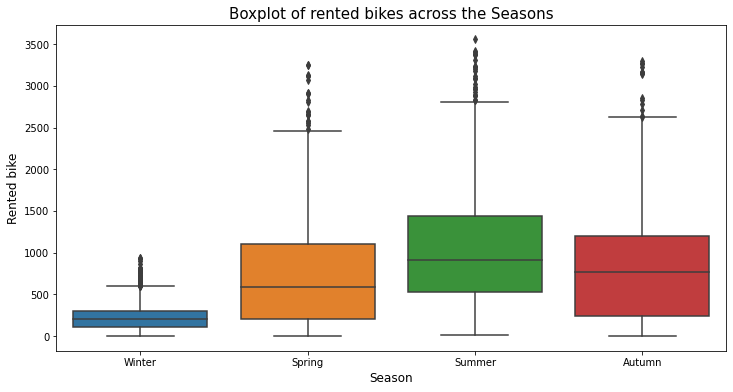

In [ ]:
#Boxplot 4 seasons
#We use the previous dataframe df1 in order to have the Seasons 
#in one unique categorical column

#We select the columns needed...
selected_columns = df1[["Bike_Count",'Seasons']]
#...and we create a new dataframe 
df_seasons = selected_columns.copy()
#We finally plot a boxplot 
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Seasons', y='Bike_Count', data=df_seasons)
#We add the legends and title 
plt.xlabel("Season", fontsize= 12)
plt.ylabel("Rented bike", fontsize= 12)
plt.title("Boxplot of rented bikes across the Seasons", fontsize= 15)

In [ ]:
#To have the total number of rented bikes across the seasons
df_season_total=df_seasons.groupby(["Seasons"]).sum()
df_season_total

,Bike_Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


We can then see that the rental bike use is very less during Winter season and high during the Summer season and somehow equivalent during Spring and Autumn. This shows the effect of weather conditions in rental bike use: the bike is then more used when the weather is more warm. Let's verify this theory with another plot taking into account the temperature

#### Barplot from rented bikes across the months from December 2017 to November 2018

Text(0, 0.5, 'Rented bike')

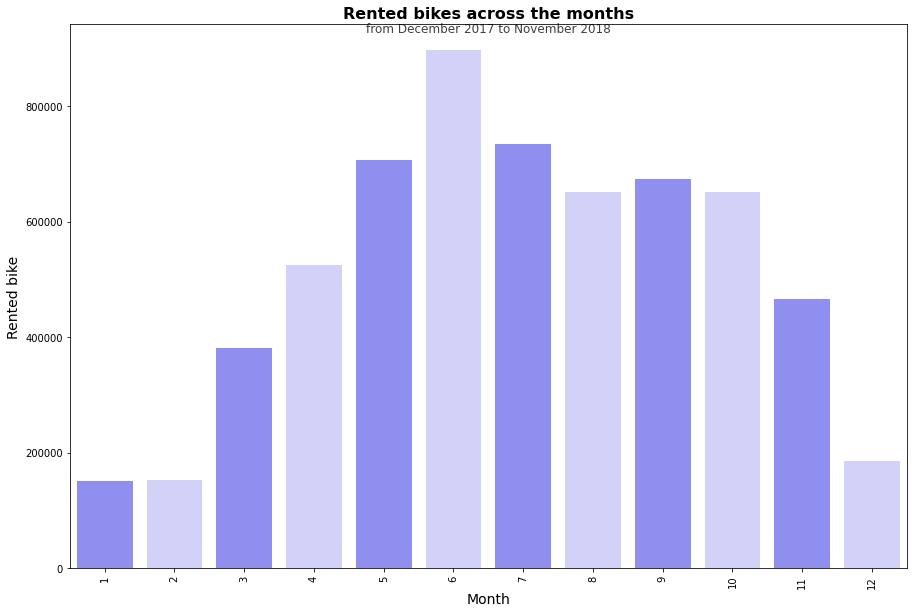

In [ ]:
#BarPlot Bike rented across the months from December 2017 to Novembre 2018

#We select the columns needed...
selected_columns5 = df1[["Bike_Count",'Month']]
df_bike_count = selected_columns5.copy()

#...and we create a new dataframe 
df_bike_count = df_bike_count.groupby(["Month"]).sum()
df_bike_count["Number_month"] = df_bike_count.index.copy()
df_bike_count["Number_month"] = df_bike_count["Number_month"].apply(lambda x : number_month(x))
df_bike_count = df_bike_count.sort_values(by = "Number_month")
df_bike_count

#We then plot

#setting a color palette
pal=['#7F7FFF','#CCCCFF']

#creating the plot
fig,ax=plt.subplots(figsize=(15,10),ncols=1,nrows=1)
ax=sns.barplot(x='Number_month',y='Bike_Count',data=df_bike_count,palette=pal,ax=ax,ci=None)

#rotation of the x label
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)

#title & subtitle
ax.set_title('Rented bikes across the months',fontsize=16,weight='bold')
ax.text(x=0.5,y=0.98,s='from December 2017 to November 2018',fontsize=12, alpha=0.75, ha='center',va='bottom',transform=ax.transAxes)

#labels axes
ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Rented bike',fontsize=14)

From this graph, we can see that in June people from Seoul rent the most bikes while they least rent bikes during January & February & December (so in winter). Bikes are also rented a lot during May, July, August, September and October.
Those months basically confirms the theory said before, that it is during Summer that bikes are most rented, where the weather is more warm.

#### Boxplot rented bikes across the week 

Text(0.5, 1.0, 'Boxplot on Bike rented across the week')

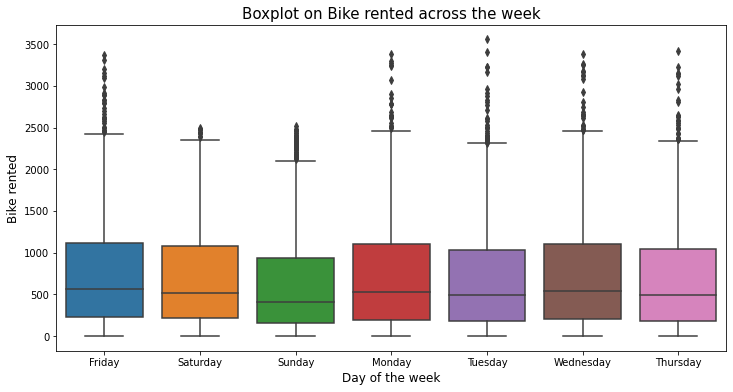

In [ ]:
#Boxplot Day week
#We use the previous dataframe df1 in order to have the Days of the week
#in one unique categorical column

#We select the columns needed...
selected_columns1 = df1[["Bike_Count",'Day_week']]
#...and we create a new dataframe 
df_days = selected_columns1.copy()

#We finally plot a boxplot 
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Day_week', y='Bike_Count', data=df_days)
#We add the legends and title 
plt.xlabel("Day of the week", fontsize= 12)
plt.ylabel("Bike rented", fontsize= 12)
plt.title("Boxplot on Bike rented across the week", fontsize= 15)

In [ ]:
#To have the total number of rented bikes across the days
df_days_total=df_days.groupby(["Day_week"]).sum()
df_days_total

,Bike_Count
Day_week,
Friday,950334
Monday,911743
Saturday,885492
Sunday,780194
Thursday,861999
Tuesday,858596
Wednesday,923956


The boxplot across day of the week represents the rental bike count is slightly higher during the weekdays and especially on Monday, Wednesday and Friday than on Sunday. Let's analyze then the impact of working days on bike rented

#### Pie chart of the percentage of total rented bikes across parts of the day

In [ ]:
def part_of_the_day(hour):
    if(hour < 6):
        return "Night"
    elif (hour < 12):
        return "Morning"
    elif (hour < 18):
        return "Afternoon"
    else :
          return "Evening"

In [ ]:
# We create the column Part of the day
df1["Part_of_the_day"] = df1["Hour"].apply(lambda x : part_of_the_day(int(x)))

# We select the needed columns...
selected_columns = df1[["Bike_Count","Part_of_the_day"]]
#...and we create a new dataframe 
df_part_of_the_day = selected_columns.copy()

# We create another new dataframe which will contain the column Part_of_the_day and a column with the percentage of the number of bikes rented for each part of the day
df_part_of_the_day_perc =  df_part_of_the_day.groupby(["Part_of_the_day"]).mean()
df_part_of_the_day_perc["Bike_Count"] = df_part_of_the_day.groupby(["Part_of_the_day"]).sum()

# We calculate the percentage of the number of bikes rented for each part of the day and create the corresponding column in the dataframe
df_part_of_the_day_perc["Bike_Count_Percentage"] = (df_part_of_the_day_perc["Bike_Count"] / df_part_of_the_day_perc["Bike_Count"].sum()) * 100

df_part_of_the_day_perc = df_part_of_the_day_perc.sort_values("Bike_Count_Percentage")

df_part_of_the_day_perc

,Bike_Count,Bike_Count_Percentage
Part_of_the_day,,
Night,636662,10.314803
Morning,1344634,21.784925
Afternoon,1857788,30.098728
Evening,2333230,37.801544


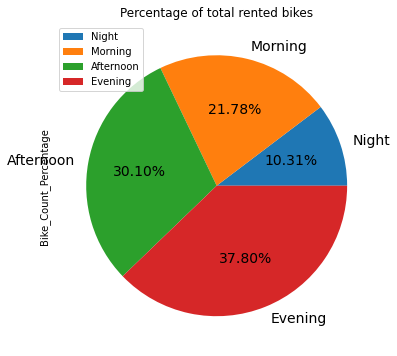

In [ ]:
df_part_of_the_day_perc.plot.pie(y='Bike_Count_Percentage', title='Percentage of total rented bikes', fontsize=14, autopct='%1.2f%%', figsize=(6,6))
plt.legend(loc="upper left")

From this pie chart, we can see that bikes are most rented in the second half of the day, i.e. in the afternoon and evening.

#### Boxplot of rented bikes across the hours of the day

Text(0.5, 1.0, 'Boxplot of rented bikes across the hours of the day')

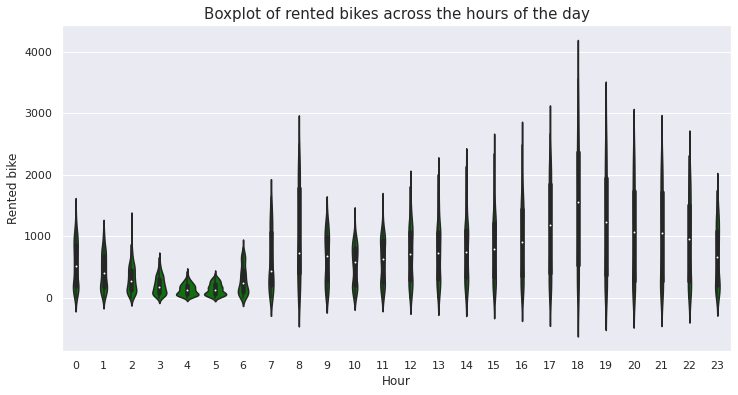

In [ ]:
#We select the columns needed...
selected_columns2 = df1[["Bike_Count",'Hour']]
#...and we create a new dataframe 
df_hour = selected_columns2.copy()

sns.set()
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=df_hour, x='Hour', y='Bike_Count', kind='line', height=4, aspect=2, color='green')
plt.xlabel("Hour", fontsize= 12)
plt.ylabel("Rented bike", fontsize= 12)
plt.title("Boxplot of rented bikes across the hours of the day", fontsize= 15)

As we can see on the plot, the bike is more used during the evening (especially near 6pm) and at 8am and is least used early in the morning (near 4/5am). We could suppose that this could be explained because those hours corresponds to the period when people go to work and go back from their work to their home, and people use bike to do so.

#### Boxplot of rented bikes across 5 first days of the week vs week-end days

Text(0.5, 1.0, 'Boxplot of rented bikes across week-end days')

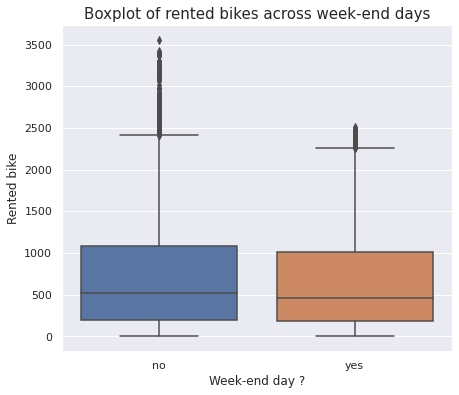

In [ ]:
# We create a new column in the dataframe to precise if the day is a week-end day or not
df1["Week_end_day"] = ["yes" if df1.iloc[i]["Day_week"] in ("Saturday", "Sunday") else 'no' for i in range(len(df1))]

fig, ax = plt.subplots(figsize=(7,6))
sns.boxplot(x='Week_end_day', y='Bike_Count', data=df1)
plt.xlabel("Week-end day ?", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Boxplot of rented bikes across week-end days", fontsize=15)

Week-end days in Seoul are Saturday and Sunday as in France.
It is noticeable that there are a little more bikes rented during the week than during the weekend.

Now, let's have a look at the distribution of rented bikes throughout the day, on week days and week-end days to see if there is a big difference or not

Text(0.5, 1.0, 'Rented bikes across the hours of the day for each day')

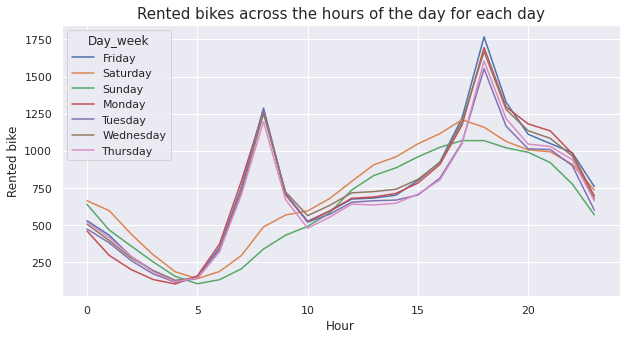

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='Hour', y='Bike_Count', data=df1,  hue='Day_week', ci=None)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes across the hours of the day for each day", fontsize=15)

Text(0.5, 1.0, 'Rented bikes across the hours of the day for week days and week-end days')

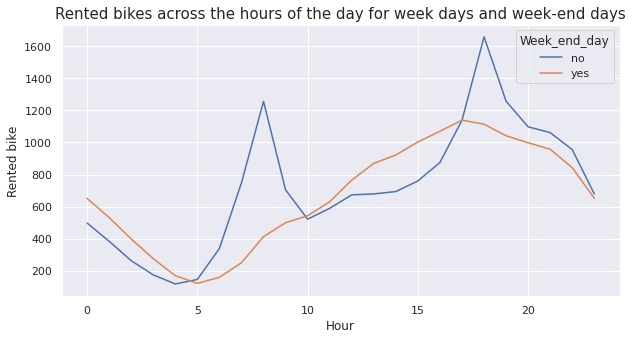

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='Hour', y='Bike_Count', data=df1, hue='Week_end_day', ci=None)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes across the hours of the day for week days and week-end days", fontsize=15)

We can observe that on weekdays there are two peaks, two times when the number of bicycle rentals is higher. These two peaks correspond to the moments when people go to and from work, illustrating commuting. On weekends, however, we don’t see such peaks. The number of rented bicycles increases progressively during the day from 5am to 4pm-5pm and then decreases progressively.
This information (week-end day or not) is therefore important for our future predictions.

#### Boxplot of rented bikes across working periods vs holidays

Text(0.5, 1.0, 'Boxplot of rented bikes across working periods')

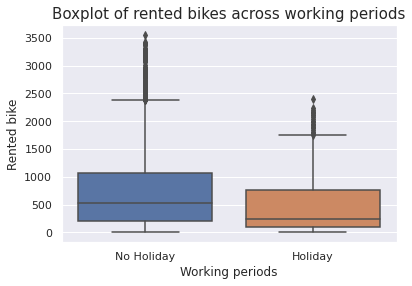

In [ ]:
#Boxplot : Working periods

#We select the columns needed...
selected_columns3 = df1[["Bike_Count","Holiday","Day_week","Hour"]]
#...and we create a new dataframe 
df_holiday = selected_columns3.copy()

#We finally plot a boxplot 
sns.boxplot(x='Holiday', y='Bike_Count', data=df_holiday)
#We add the legends and title 
plt.xlabel("Working periods", fontsize= 12)
plt.ylabel("Rented bike", fontsize= 12)
plt.title("Boxplot of rented bikes across working periods", fontsize= 15)

In [ ]:
#To have the total number of rented bikes across the working periods
df_holiday_total=df_holiday.groupby(["Holiday"]).sum()
df_holiday_total

,Bike_Count,Hour
Holiday,,
Holiday,215895,4968
No Holiday,5956419,95772


We can see from this boxplot that the bikes are more rented during working days than on day off. So people need more the bike to go to work than they do on holidays for their time off.

Now, let's have a look at the distribution of rented bikes throughout the day, on working periods and holidays.

Text(0.5, 1.0, 'Rented bikes across the hours of the day for working days and holidays')

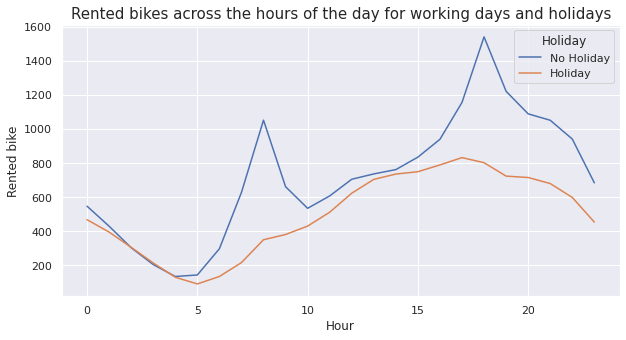

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='Hour', y='Bike_Count', data=df_holiday, hue='Holiday', ci=None)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes across the hours of the day for working days and holidays", fontsize=15)

For periods of work, there are two peaks illustrating the commuting movements observed previously.
However, during the holidays, there are no longer such large peaks. You can still see them, but they are much less strong, rough. Demand for bicycles increases fairly gradually throughout the day from 5am to 4pm-5pm.

### Visualizations according to meteorological variables/factors <a class="anchor" id="4.2"></a>

Seoul has a cold temperate climate. Seoul is a city with more rainfall in summer than in winter.

Weather data are difficult to predict since there is always a degree of unpredictability. They are not the same from year to year and there are significant variations.

#### Evolution of temperature across the months

Text(0, 0.5, 'Temp in °C')

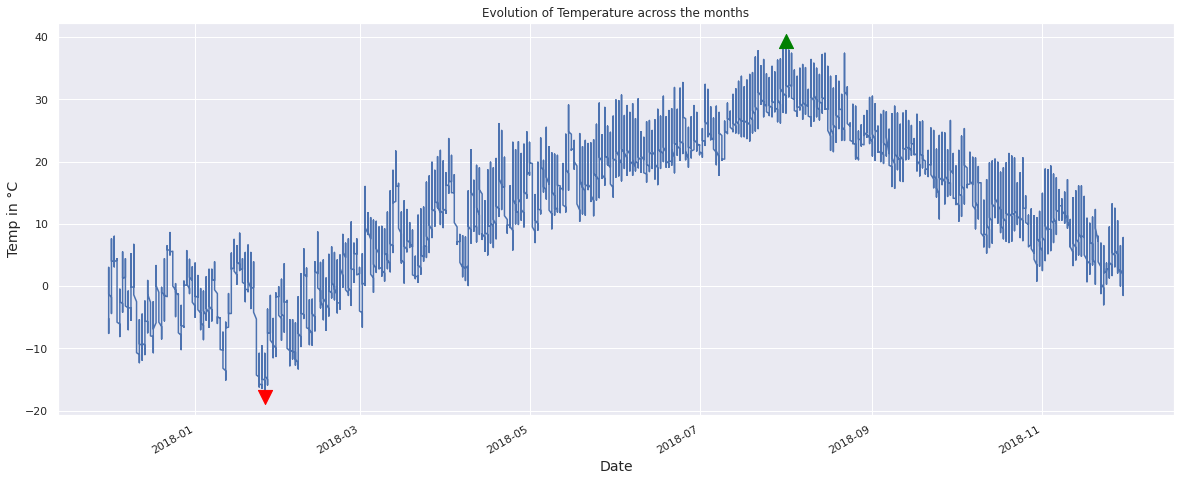

In [ ]:
#Weather through the month...

#We select the columns needed...
selected_columns6 = df1[["Bike_Count",'Date','Month','Temp',"Seasons"]]
#...and we create a new dataframe 
df_weather = selected_columns6.copy()

#plot
graph=df_weather.set_index('Date')['Temp']
ax=graph.plot(kind='line',figsize=(20,8),grid='on',style='-',title='Evolution of Temperature across the months')
#min
ax.scatter(
            graph.idxmin(),#id of the value
            graph.min(),
            c='red',
            marker='v',
            s=200, #size
            zorder=3, #pour être au premier plan
            label='min value'
            
)
#max
ax.scatter(
            graph.idxmax(), #id of the value
            graph.max(),
            c='green',
            marker='^',
            s=200, #size
            zorder=3, #pour être au premier plan
            label='max value'
)

#show legend
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Temp in °C',fontsize=14)

We can see from this graph that the lowest temperature is at the end of January, and that December, January and February are the coldest months with negatives temperatures. While the highest temperature registered is at the beginning of August, and the hottest months are June, July, August, September. <br><br> If we compare this graph and the graph of the one just above, we can see that the bike is most used in June, because the weather is neither too hot nor too cold, between 20°C and 30°C, so a weather warm enough to ride a bike. And the bike is least used during december, january and february because as we can see, the temperature are way too cold, very often negatives temperature (between 10°C to -20°C)
<br><br>So we logically proved the relationship between the use of the bike and the weather obviously linked to the period of the year.

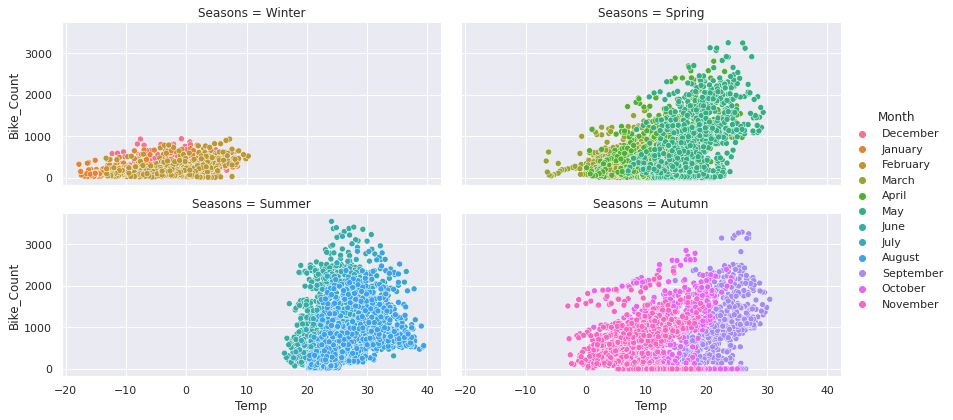

In [ ]:
sns.set()
sns.relplot(data=df_weather, x="Temp", y="Bike_Count", hue="Month", col="Seasons", col_wrap=2, kind='scatter', height=3, aspect=2)

This graph can confirm what we said previously, the linked impact of the weather and time of the year on the bike rented. 

In [ ]:
# We create a dataframe with the number of bike rented by month
# We will then use it. 

selected_columns = df1[["Bike_Count","Month"]]
df_bike_count = selected_columns.copy()

df_bike_count = df_bike_count.groupby(["Month"]).sum()
df_bike_count["Number_month"] = df_bike_count.index.copy()
df_bike_count["Number_month"] = df_bike_count["Number_month"].apply(lambda x : number_month(x))
df_bike_count = df_bike_count.sort_values(by = "Number_month")
df_bike_count

,Bike_Count,Number_month
Month,,
January,150006,1
February,151833,2
March,380594,3
April,524227,4
May,707088,5
June,896887,6
July,734460,7
August,651887,8
September,673612,9


#### Temperature

##### Average temperature per month

In [ ]:
selected_columns = df1[["Month","Temp"]]

df_temperature_per_m = selected_columns.copy()

df_temperature_per_m = df_temperature_per_m.groupby(["Month"]).mean()
df_temperature_per_m["Number_month"] = df_temperature_per_m.index.copy()
df_temperature_per_m["Number_month"] = df_temperature_per_m["Number_month"].apply(lambda x : number_month(x))
df_temperature_per_m = df_temperature_per_m.sort_values(by = "Number_month")

df_temperature_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_temperature_per_m

,Temp,Number_month,Bike_Count
Month,,,
January,-3.943145,1,150006
February,-1.664732,2,151833
March,8.044489,3,380594
April,12.948056,4,524227
May,18.144355,5,707088
June,23.136806,6,896887
July,27.763978,7,734460
August,28.736425,8,651887
September,21.498750,9,673612


Text(0.5, 1.0, 'Average temperature per month')

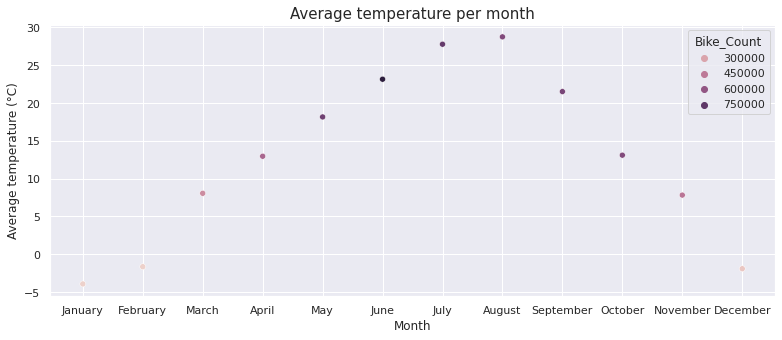

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_temperature_per_m.index, y=df_temperature_per_m['Temp'], hue=df_temperature_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average temperature (°C)", fontsize=12)
plt.title("Average temperature per month", fontsize=15)

The months with the most rented bikes are May, June and July, August, September, so in summer, with high temperatures. 

##### Rented bikes depending on the temperature 

Text(0.5, 1.0, 'Rented bikes depending on the temperature')

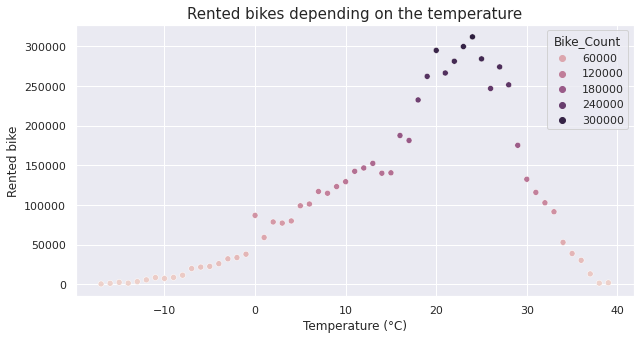

In [ ]:
selected_columns = df1[["Bike_Count","Temp"]]

df_temperature = selected_columns.copy()
df_temperature["Temp"] = df_temperature["Temp"].astype(int)

df_temperature = df_temperature.groupby(["Temp"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_temperature.index, y=df_temperature['Bike_Count'], hue=df_temperature['Bike_Count'])
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the temperature", fontsize=15)

The number of rented bikes is high for temperatures between 10 and 30 °C. For temperatures below -5 °C and above 37 °C, it is very low.
Those temperatures correpond to end-spring, summer months.
Temperature seems to be an important parameter to consider in our future modelling.

#### Dew point temperature

##### Average dew point temperature per month

In [ ]:
selected_columns = df1[["Month","Dew"]]

df_dew_point_temperature_per_m = selected_columns.copy()

df_dew_point_temperature_per_m = df_dew_point_temperature_per_m.groupby(["Month"]).mean()
df_dew_point_temperature_per_m["Number_month"] = df_dew_point_temperature_per_m.index.copy()
df_dew_point_temperature_per_m["Number_month"] = df_dew_point_temperature_per_m["Number_month"].apply(lambda x : number_month(x))
df_dew_point_temperature_per_m = df_dew_point_temperature_per_m.sort_values(by = "Number_month")

df_dew_point_temperature_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_dew_point_temperature_per_m

,Dew,Number_month,Bike_Count
Month,,,
January,-13.913844,1,150006
February,-13.053274,2,151833
March,-0.270699,3,380594
April,2.520556,4,524227
May,10.058737,5,707088
June,14.775972,6,896887
July,20.576478,7,734460
August,20.769758,8,651887
September,12.908194,9,673612


Text(0.5, 1.0, 'Average dew point temperature per month')

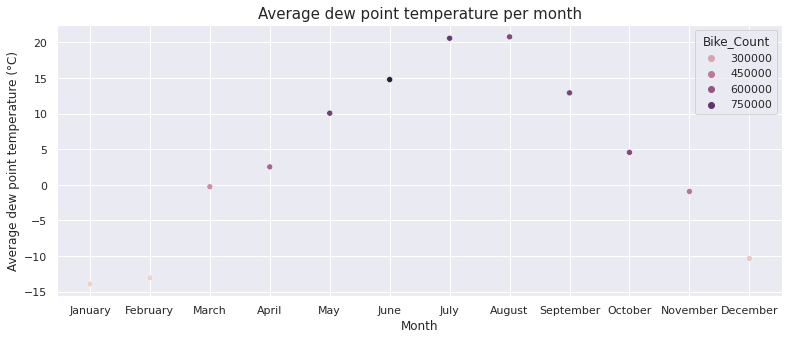

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_dew_point_temperature_per_m.index, y=df_dew_point_temperature_per_m['Dew'], hue=df_dew_point_temperature_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average dew point temperature (°C)", fontsize=12)
plt.title("Average dew point temperature per month", fontsize=15)

##### Rented bikes depending on the dew point temperature

Text(0.5, 1.0, 'Rented bikes depending on the dew point temperature')

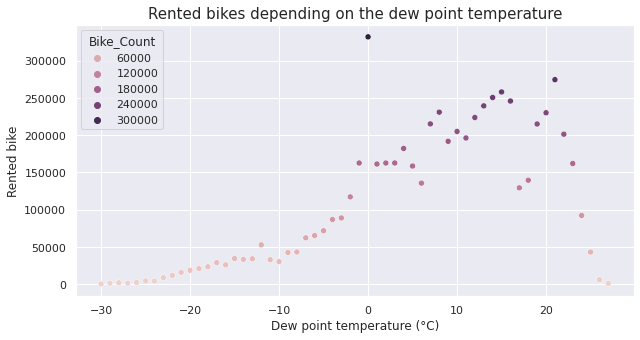

In [ ]:
selected_columns = df1[["Bike_Count","Dew"]]

df_dew_point_temperature = selected_columns.copy()
df_dew_point_temperature["Dew"] = df_dew_point_temperature["Dew"].astype(int)

df_dew_point_temperature = df_dew_point_temperature.groupby(["Dew"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_dew_point_temperature.index, y=df_dew_point_temperature['Bike_Count'], hue=df_dew_point_temperature['Bike_Count'])
plt.xlabel("Dew point temperature (°C)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the dew point temperature", fontsize=15)

The number of rented bikes is high for dew point temperatures between 10 and 20 °C, corresponding to May, June, July, August and September months.
<br><br>The second graph confirms that the number of rented bikes is high for dew point temperature between 10 and 20 °C.
So the dew point temperature, linked to temperature, may have an influence on our target variable.

#### Humidity

##### Average humidity per month

In [ ]:
selected_columns = df1[["Month","Hum"]]

df_humidity_per_m = selected_columns.copy()

df_humidity_per_m = df_humidity_per_m.groupby(["Month"]).mean()
df_humidity_per_m["Number_month"] = df_humidity_per_m.index.copy()
df_humidity_per_m["Number_month"] = df_humidity_per_m["Number_month"].apply(lambda x : number_month(x))
df_humidity_per_m = df_humidity_per_m.sort_values(by = "Number_month")

df_humidity_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_humidity_per_m

,Hum,Number_month,Bike_Count
Month,,,
January,48.081989,1,150006
February,44.854167,2,151833
March,59.295699,3,380594
April,54.611111,4,524227
May,62.288978,5,707088
June,62.618056,6,896887
July,67.447581,7,734460
August,64.802419,8,651887
September,60.700000,9,673612


Text(0.5, 1.0, 'Average humidity per month')

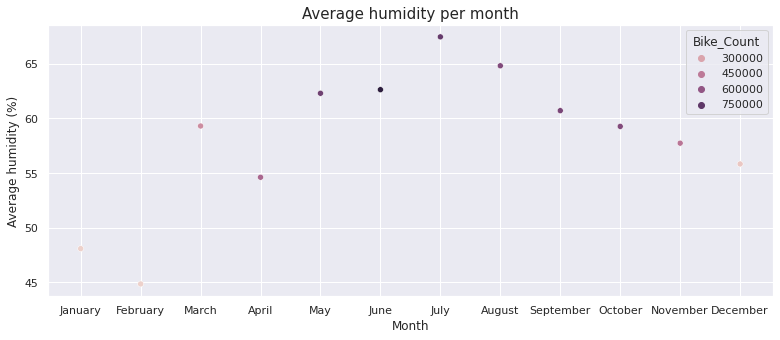

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_humidity_per_m.index, y=df_humidity_per_m['Hum'], hue=df_humidity_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average humidity (%)", fontsize=12)
plt.title("Average humidity per month", fontsize=15)

The wettest season in Seoul is summer, it is the rainy season there at that time.
The months with the most rented bikes are May, June, July, August and September, so in summer, despite the humidity. 
We might think that because summer is the rainy season (then high humidity rate), people are less likely to cycle, but that’s not what we observe. 
<br><br>Therefore, humidity is not necessarily an important parameter to consider for our future modelling.

##### Rented bikes depending on the humidity

Text(0.5, 1.0, 'Rented bikes depending on the humidity')

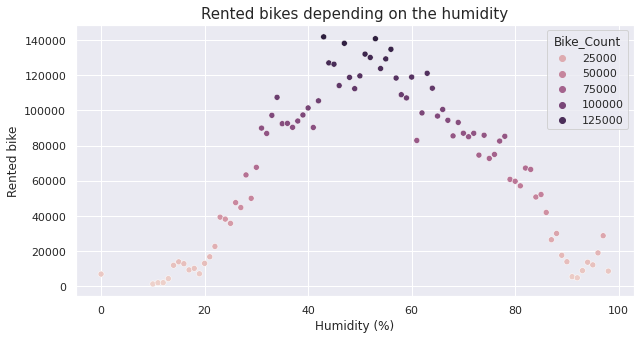

In [ ]:
selected_columns = df1[["Bike_Count","Hum"]]

df_humidity = selected_columns.copy()

df_humidity = df_humidity.groupby(["Hum"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_humidity.index, y=df_humidity['Bike_Count'], hue=df_humidity['Bike_Count'])
plt.xlabel("Humidity (%)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the humidity", fontsize=15)

The humidity percentage rarely exceeds 80% and is rarely below 50% so it is normal to observe a few data (few rented bikes) for percentages below 50% and above 80%.
<br><br>
The number of rented bikes does not seem to depend much on humidity.

#### Rainfall

##### Average rainfall per month

In [ ]:
selected_columns = df1[["Month","Rain"]]

df_rainfall_per_m = selected_columns.copy()

df_rainfall_per_m = df_rainfall_per_m.groupby(["Month"]).mean()
df_rainfall_per_m["Number_month"] = df_rainfall_per_m.index.copy()
df_rainfall_per_m["Number_month"] = df_rainfall_per_m["Number_month"].apply(lambda x : number_month(x))
df_rainfall_per_m = df_rainfall_per_m.sort_values(by = "Number_month")

df_rainfall_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_rainfall_per_m

,Rain,Number_month,Bike_Count
Month,,,
January,0.011425,1,150006
February,0.041071,2,151833
March,0.069220,3,380594
April,0.180972,4,524227
May,0.298387,5,707088
June,0.238194,6,896887
July,0.249462,7,734460
August,0.272312,8,651887
September,0.095139,9,673612


Text(0.5, 1.0, 'Average rainfall per month')

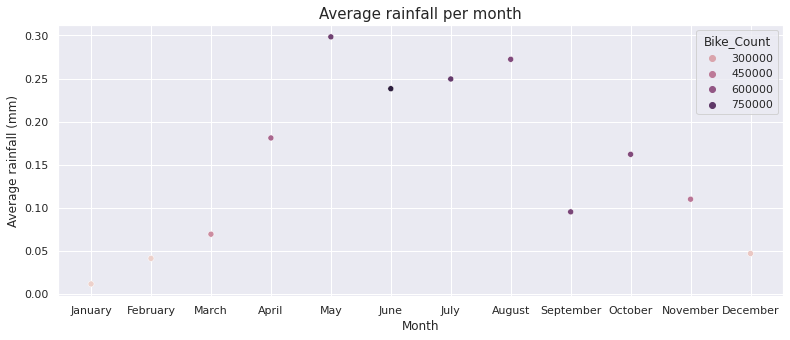

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_rainfall_per_m.index, y=df_rainfall_per_m['Rain'], hue=df_rainfall_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average rainfall (mm)", fontsize=12)
plt.title("Average rainfall per month", fontsize=15)

##### Rented bikes depending on the rainfall

Text(0.5, 1.0, 'Rented bikes depending on the rainfall')

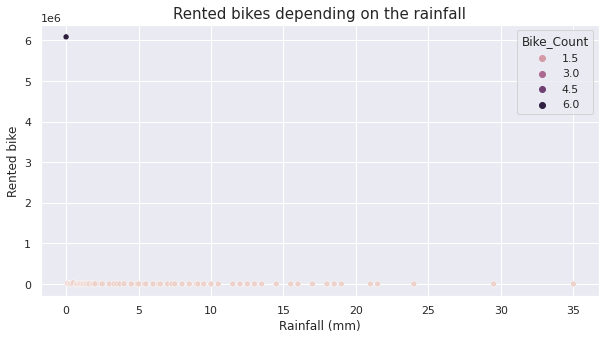

In [ ]:
selected_columns = df1[["Bike_Count","Rain"]]

df_rainfall = selected_columns.copy()

df_rainfall = df_rainfall.groupby(["Rain"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_rainfall.index, y=df_rainfall['Bike_Count'], hue=df_rainfall['Bike_Count'])
plt.xlabel("Rainfall (mm)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the rainfall", fontsize=15)

The number of rented bikes is highest in the months of May, June, July, August and September, when the rains are highest (summer is the rainy season in Seoul).
<br>
However, looking at the second graph, the number of rented bikes does not appear to be affected by precipitation.
<br><br>
Therefore, rainfall is not necessarily an important parameter to consider for our future modelling.


#### Snowfall

##### Average snowfall per month

In [ ]:
selected_columns = df1[["Month","Snow"]]

df_snowfall_per_m = selected_columns.copy()

df_snowfall_per_m = df_snowfall_per_m.groupby(["Month"]).mean()
df_snowfall_per_m["Number_month"] = df_snowfall_per_m.index.copy()
df_snowfall_per_m["Number_month"] = df_snowfall_per_m["Number_month"].apply(lambda x : number_month(x))
df_snowfall_per_m = df_snowfall_per_m.sort_values(by = "Number_month")

df_snowfall_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_snowfall_per_m

,Snow,Number_month,Bike_Count
Month,,,
January,0.255376,1,150006
February,0.102083,2,151833
March,0.000000,3,380594
April,0.000000,4,524227
May,0.000000,5,707088
June,0.000000,6,896887
July,0.000000,7,734460
August,0.000000,8,651887
September,0.000000,9,673612


Text(0.5, 1.0, 'Average snowfall per month')

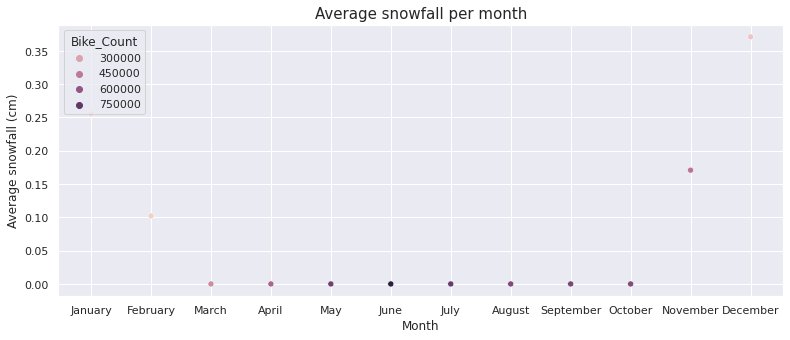

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_snowfall_per_m.index, y=df_snowfall_per_m['Snow'], hue=df_snowfall_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average snowfall (cm)", fontsize=12)
plt.title("Average snowfall per month", fontsize=15)

##### Rented bikes depending on the snowfall

Text(0.5, 1.0, 'Rented bikes depending on the snowfall')

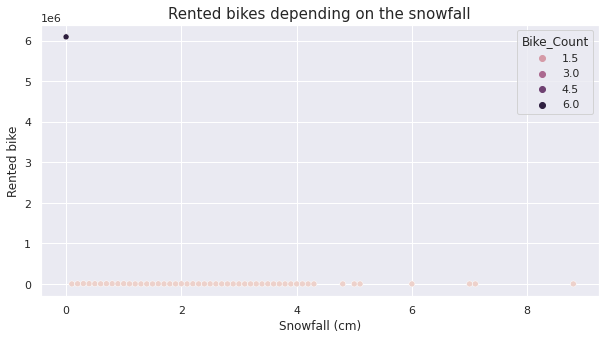

In [ ]:
selected_columns = df1[["Bike_Count","Snow"]]

df_snowfall = selected_columns.copy()


df_snowfall = df_snowfall.groupby(["Snow"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_snowfall.index, y=df_snowfall['Bike_Count'], hue=df_snowfall['Bike_Count'])
plt.xlabel("Snowfall (cm)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the snowfall", fontsize=15)

The number of rented bikes is highest in the months of May, June, July, August and September, when the snowfall is weakest, non-existent.<br>
Looking at the second graph, the number of rented bikes is at the highest when there is no snowfall.
<br><br>
Snowfall doesn't seem to be an important parameter to consider for our future modelling.

#### Wind speed

##### Average wind per month

In [ ]:
selected_columns = df1[["Month","Wind"]]

df_wind_per_m = selected_columns.copy()

df_wind_per_m = df_wind_per_m.groupby(["Month"]).mean()
df_wind_per_m["Number_month"] = df_wind_per_m.index.copy()
df_wind_per_m["Number_month"] = df_wind_per_m["Number_month"].apply(lambda x : number_month(x))
df_wind_per_m = df_wind_per_m.sort_values(by = "Number_month")

df_wind_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_wind_per_m

,Wind,Number_month,Bike_Count
Month,,,
January,1.872581,1,150006
February,2.182887,2,151833
March,1.921774,3,380594
April,1.985972,4,524227
May,1.719624,5,707088
June,1.675833,6,896887
July,1.454167,7,734460
August,1.700403,8,651887
September,1.554028,9,673612


Text(0.5, 1.0, 'Average wind speed per month')

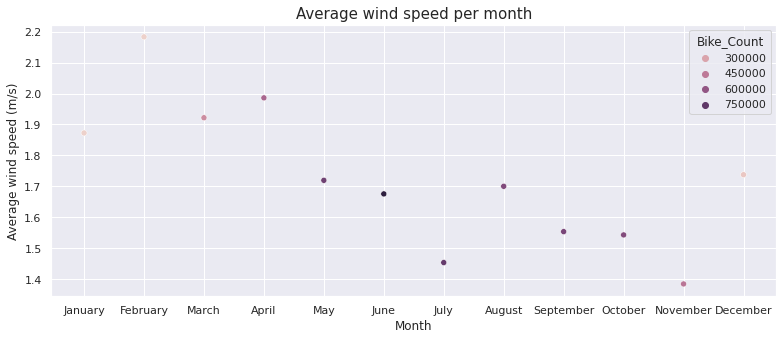

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_wind_per_m.index, y=df_wind_per_m['Wind'], hue=df_wind_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average wind speed (m/s)", fontsize=12)
plt.title("Average wind speed per month", fontsize=15)

##### Rented bikes depending on the wind 

Text(0.5, 1.0, 'Rented bikes depending on the wind speed')

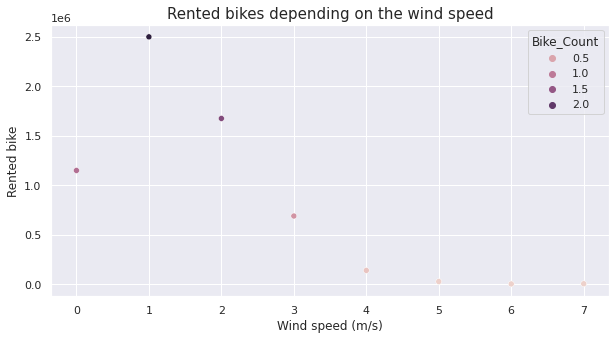

In [ ]:
selected_columns = df1[["Bike_Count","Wind"]]

df_wind = selected_columns.copy()

df_wind["Wind"] = df_wind["Wind"].astype(int)
df_wind = df_wind.groupby(["Wind"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_wind.index, y=df_wind['Bike_Count'], hue=df_wind['Bike_Count'])
plt.xlabel("Wind speed (m/s)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the wind speed", fontsize=15)

The strongest winds observed are in winter and early spring.
The number of rented bikes is highest in the months of May, June, July, August and September, when winds are weakest.
<br>
Looking at the second graph, we see again that the number of rented bikes is higher for low winds. 
<br><br>
So wind speed may have an influence on our target variable.

#### Visibility

##### Average visibility per month 

In [ ]:
selected_columns = df1[["Month","Vis"]]

df_visibility_per_m = selected_columns.copy()

df_visibility_per_m = df_visibility_per_m.groupby(["Month"]).mean()
df_visibility_per_m["Number_month"] = df_visibility_per_m.index.copy()
df_visibility_per_m["Number_month"] = df_visibility_per_m["Number_month"].apply(lambda x : number_month(x))
df_visibility_per_m = df_visibility_per_m.sort_values(by = "Number_month")

df_visibility_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_visibility_per_m

,Vis,Number_month,Bike_Count
Month,,,
January,1459.887097,1,150006
February,1556.528274,2,151833
March,1143.004032,3,380594
April,1327.868056,4,524227
May,1253.044355,5,707088
June,1244.911111,6,896887
July,1538.481183,7,734460
August,1713.559140,8,651887
September,1816.797222,9,673612


Text(0.5, 1.0, 'Average visibility per month')

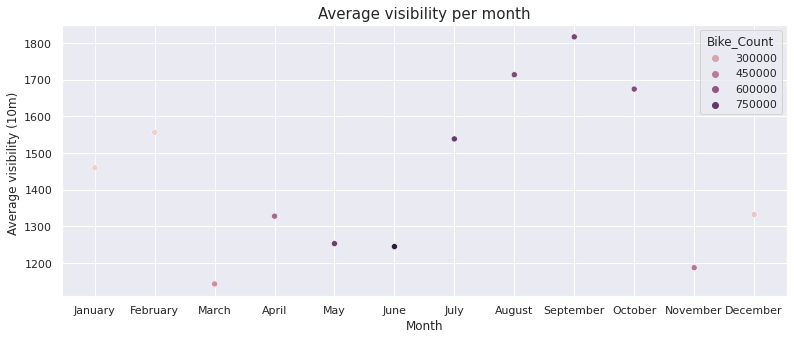

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_visibility_per_m.index, y=df_visibility_per_m['Vis'], hue=df_visibility_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average visibility (10m) ", fontsize=12)
plt.title("Average visibility per month", fontsize=15)

##### Rented bikes depending on the visibility

Text(0.5, 1.0, 'Rented bikes depending on the visibility')

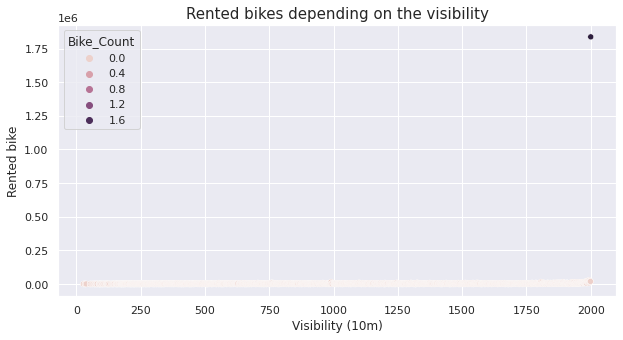

In [ ]:
selected_columns = df1[["Bike_Count","Vis"]]

df_visibility = selected_columns.copy()

df_visibility = df_visibility.groupby(["Vis"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_visibility.index, y=df_visibility['Bike_Count'], hue=df_visibility['Bike_Count'])
plt.xlabel("Visibility (10m)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the visibility", fontsize=15)

The best visibility observed are between July and October.
The number of rented bikes is highest in the months of May, June, July, August and September, when there is a good visibility. However, there is also good visibility in January and February according to the first graph.
<br>
The second graph shows that the higher visibility we have, the higher the number of rented bikes is.
<br><br>
So according to these observations, visibility could have some influence on our target variable.

#### Solar radiation 

##### Average solar radiation per month

In [ ]:
selected_columns = df1[["Month","Solar"]]

df_solar_rad_per_m = selected_columns.copy()

df_solar_rad_per_m = df_solar_rad_per_m.groupby(["Month"]).mean()
df_solar_rad_per_m["Number_month"] = df_solar_rad_per_m.index.copy()
df_solar_rad_per_m["Number_month"] = df_solar_rad_per_m["Number_month"].apply(lambda x : number_month(x))
df_solar_rad_per_m = df_solar_rad_per_m.sort_values(by = "Number_month")

df_solar_rad_per_m["Bike_Count"] = df_bike_count["Bike_Count"].copy()
df_solar_rad_per_m

,Solar,Number_month,Bike_Count
Month,,,
January,0.226747,1,150006
February,0.481667,2,151833
March,0.600013,3,380594
April,0.712764,4,524227
May,0.754355,5,707088
June,0.836931,6,896887
July,0.754167,7,734460
August,0.695108,8,651887
September,0.654111,9,673612


Text(0.5, 1.0, 'Average solar radiation per month')

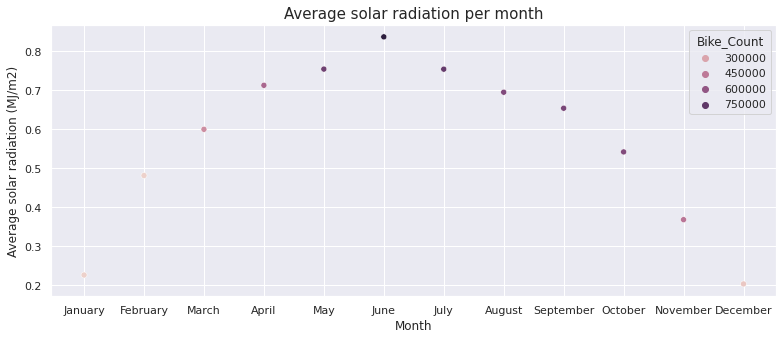

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
sns.scatterplot(x=df_solar_rad_per_m.index, y=df_solar_rad_per_m['Solar'], hue=df_solar_rad_per_m["Bike_Count"])
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average solar radiation (MJ/m2)", fontsize=12)
plt.title("Average solar radiation per month", fontsize=15)

##### Rented bikes depending on the solar radiation 

Text(0.5, 1.0, 'Rented bikes depending on the solar radiation')

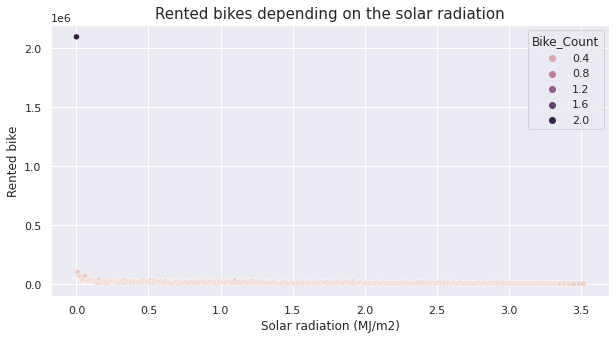

In [ ]:
selected_columns = df1[["Bike_Count","Solar"]]

df_solar_rad = selected_columns.copy()

df_solar_rad = df_solar_rad.groupby(["Solar"]).sum()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=df_solar_rad.index, y=df_solar_rad['Bike_Count'], hue=df_solar_rad['Bike_Count'])
plt.xlabel("Solar radiation (MJ/m2)", fontsize=12)
plt.ylabel("Rented bike", fontsize=12)
plt.title("Rented bikes depending on the solar radiation", fontsize=15)

The highest solar radiation observed are between April and September.
The number of rented bikes is highest in the months of May, June, July, August and September, when there is high solar radiation. 
<br>
The second graph shows that the higher solar radiation we have, the higher the number of rented bikes is.
<br><br>
So according to these observations, solar radiation seems to have an influence on our target variable.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Bike_Count       8760 non-null   int64         
 2   Hour             8760 non-null   int64         
 3   Temp             8760 non-null   float64       
 4   Hum              8760 non-null   int64         
 5   Wind             8760 non-null   float64       
 6   Vis              8760 non-null   int64         
 7   Dew              8760 non-null   float64       
 8   Solar            8760 non-null   float64       
 9   Rain             8760 non-null   float64       
 10  Snow             8760 non-null   float64       
 11  Seasons          8760 non-null   object        
 12  Holiday          8760 non-null   object        
 13  FDay             8760 non-null   object        
 14  Day_week         8760 non-null   object 

In [ ]:
#TO REMOVE THE TARGET
df_copy=df1.copy()
target = 'Bike_Count'
features_list = list(df_copy.columns)
features_list.remove(target)

##5. Dimensionality Reduction

### Correlation matrix

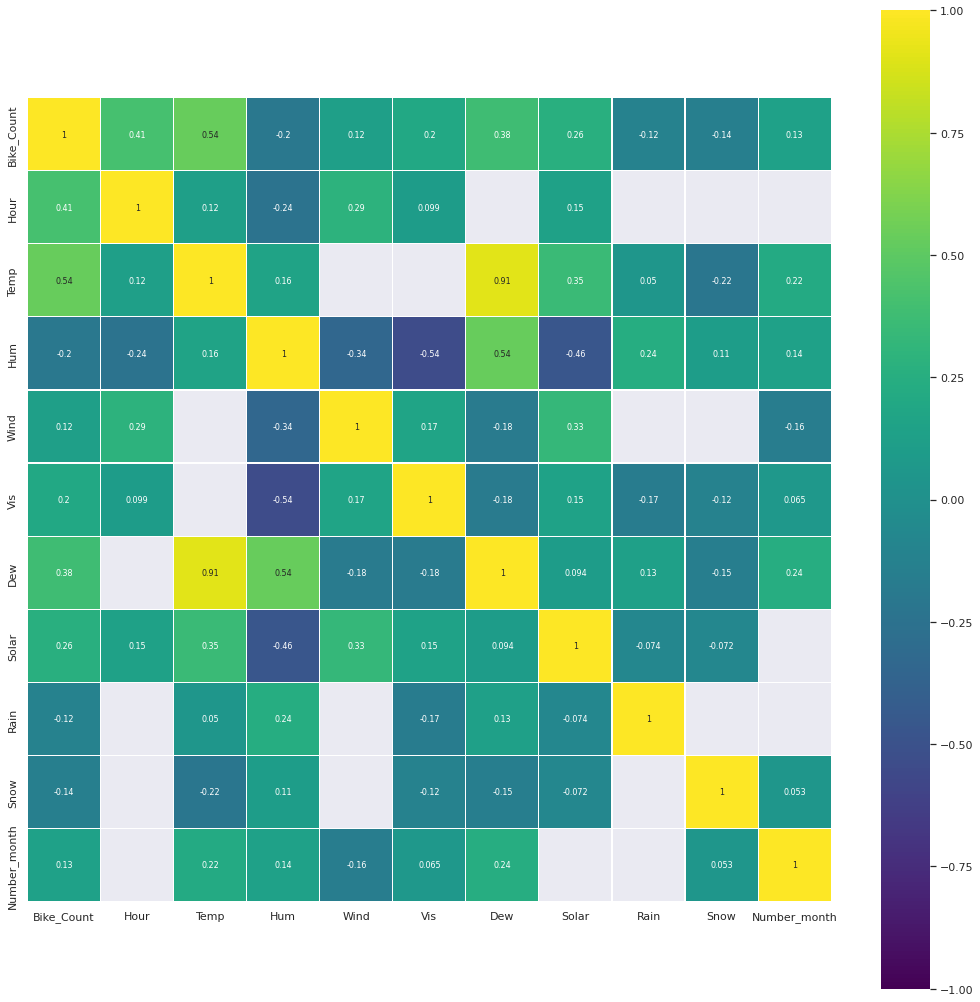

In [ ]:
#We try to see the influence of all features on the target
corr= df1.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.05) | (corr <= -0.05)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, ax=ax,annot_kws={"size": 8}, square=True)

We can see that Hour and Temperature have the strongest influence on the target variable (Bike_Count) and that Snow, Rain and Humidity have the least influence on the target

### PCA: final analysis

As a final check, let's do a PCA to check if the columns corresponding to some weather features have an impact on the target variable Bike_Count

In [ ]:
df_acp=df1.copy()
df_acp.head()
#we drop the categorical columns and only keep our target value and the weather relevant columns
del_columns2 = ['Bike_Count','Temp','Date', 'Hour', 'Seasons','Holiday','FDay','Day_week','Month','Number_month','Part_of_the_day','Week_end_day']
df_acp_num=df_acp.drop(del_columns2, axis=1)
#let's check the number of columns now
df_acp_num.columns

Index(['Hum', 'Wind', 'Vis', 'Dew', 'Solar', 'Rain', 'Snow'], dtype='object')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(df_acp_num)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[3.70155140e+05 3.62249786e+02 9.56580909e+01 1.22279034e+00
 9.71196101e-01 4.00476863e-01 1.73647579e-01]
[9.98756999e-01 9.77426678e-04 2.58105798e-04 3.29934742e-06
 2.62049286e-06 1.08057143e-06 4.68537961e-07]


In [ ]:
#we represent the variances in a dataframe
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Explained Variance" : pca.explained_variance_,
        "% Explained variance" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. exp. var." : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Explained Variance,% Explained variance,% cum. exp. var.
0,Dim1,370155.140340,100.0,100.0
1,Dim2,362.249786,0.0,100.0
2,Dim3,95.658091,0.0,100.0
3,Dim4,1.222790,0.0,100.0
4,Dim5,0.971196,0.0,100.0
5,Dim6,0.400477,0.0,100.0
6,Dim7,0.173648,0.0,100.0


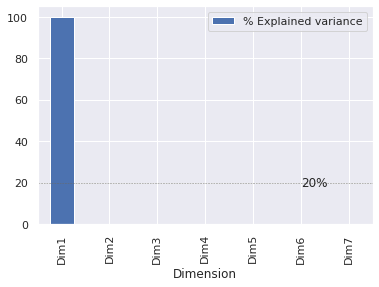

In [ ]:
eig.plot.bar(x = "Dimension", y = "% Explained variance") 
plt.text(5, 18, "20%") 
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--") # line 20 = 100 / 5 (nb dimensions)
plt.show()

We can see that dimension 1 is enough to explain 100% of the data variation. Dim1 correponds to Visibility. We choose to keep also Dim2 (Solar) and Dim3 (Dew) because their explained variance are not close to 0. The four others (Humidity, Snowfall, Wind and Rainfall)
do not seem to indeed have an impact on the target value so we will remove them.

## 6. Feature Engineering <a class="anchor" id="5."></a>

Now that we have explored the different columns and see their influence on the target variable, we will create our model. <br> First we need to select only the columns useful for our model and then convert categorical features into numerical values.

- Number_month and Month give the same information, we choose to only keep Number_month
- We previously said that wind, rainfall and snowfall do not really have an impact on our target value: we choose to remove them from our first models

In [ ]:
# We make a copy of our dataframe
df_bike = df1.copy()
df_bike.head()

,Date,Bike_Count,Hour,Temp,Hum,Wind,Vis,Dew,Solar,Rain,Snow,Seasons,Holiday,FDay,Day_week,Month,Number_month,Part_of_the_day,Week_end_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,12,Night,no
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,12,Night,no
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,12,Night,no
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,12,Night,no
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,12,Night,no


In [ ]:
# We remove the useless columns
del_columns = ['Snow', 'Wind','Rain','Month','Hum']
df_bike = df_bike.drop(del_columns, axis=1)

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Bike_Count       8760 non-null   int64         
 2   Hour             8760 non-null   int64         
 3   Temp             8760 non-null   float64       
 4   Vis              8760 non-null   int64         
 5   Dew              8760 non-null   float64       
 6   Solar            8760 non-null   float64       
 7   Seasons          8760 non-null   object        
 8   Holiday          8760 non-null   object        
 9   FDay             8760 non-null   object        
 10  Day_week         8760 non-null   object        
 11  Number_month     8760 non-null   int64         
 12  Part_of_the_day  8760 non-null   object        
 13  Week_end_day     8760 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(

Binary values for the columns "Holiday" and "FDay"

In [ ]:
df_bike['Holiday'] = [1 if x=='Holiday' else 0 for x in df_bike['Holiday']]
df_bike['FDay'] = [1 if x=='Yes' else 0 for x in df_bike['FDay']]

Seasons, Day_week, Part_of_the_day and Week_end_day are categorical features. : we convert categorical features into numerical values using the get_dummies function from pandas

In [ ]:
dummies = ['Seasons','Day_week','Part_of_the_day','Week_end_day']
dummy_data= pd.get_dummies(df_bike[dummies])
dummy_data.shape

(8760, 17)

In [ ]:
#we concat the 2 frames and drop the old columns 
df_bike = pd.concat([df_bike, dummy_data], axis = 1)
df_bike.drop(dummies, axis=1, inplace=True)

In [ ]:
df_bike.head()

,Date,Bike_Count,Hour,Temp,Vis,Dew,Solar,Holiday,FDay,Number_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_week_Friday,Day_week_Monday,Day_week_Saturday,Day_week_Sunday,Day_week_Thursday,Day_week_Tuesday,Day_week_Wednesday,Part_of_the_day_Afternoon,Part_of_the_day_Evening,Part_of_the_day_Morning,Part_of_the_day_Night,Week_end_day_no,Week_end_day_yes
0,2017-12-01,254,0,-5.2,2000,-17.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
1,2017-12-01,204,1,-5.5,2000,-17.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
2,2017-12-01,173,2,-6.0,2000,-17.7,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
3,2017-12-01,107,3,-6.2,2000,-17.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,2017-12-01,78,4,-6.0,2000,-18.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0


To avoid raising an error with the DateTime format, we convert this datatype column in numeric

In [ ]:
df_bike['Date'] = pd.to_numeric(pd.to_datetime(df_bike['Date']))

Let's check if all values are numeric

In [ ]:
df_bike.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Date                         True
Bike_Count                   True
Hour                         True
Temp                         True
Vis                          True
Dew                          True
Solar                        True
Holiday                      True
FDay                         True
Number_month                 True
Seasons_Autumn               True
Seasons_Spring               True
Seasons_Summer               True
Seasons_Winter               True
Day_week_Friday              True
Day_week_Monday              True
Day_week_Saturday            True
Day_week_Sunday              True
Day_week_Thursday            True
Day_week_Tuesday             True
Day_week_Wednesday           True
Part_of_the_day_Afternoon    True
Part_of_the_day_Evening      True
Part_of_the_day_Morning      True
Part_of_the_day_Night        True
Week_end_day_no              True
Week_end_day_yes             True
dtype: bool

We have now these columns containing only numerical values.
The dataset is now cleaned up 

In [ ]:
df_bike

,Date,Bike_Count,Hour,Temp,Vis,Dew,Solar,Holiday,FDay,Number_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_week_Friday,Day_week_Monday,Day_week_Saturday,Day_week_Sunday,Day_week_Thursday,Day_week_Tuesday,Day_week_Wednesday,Part_of_the_day_Afternoon,Part_of_the_day_Evening,Part_of_the_day_Morning,Part_of_the_day_Night,Week_end_day_no,Week_end_day_yes
0,1512086400000000000,254,0,-5.2,2000,-17.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
1,1512086400000000000,204,1,-5.5,2000,-17.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
2,1512086400000000000,173,2,-6.0,2000,-17.7,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
3,1512086400000000000,107,3,-6.2,2000,-17.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,1512086400000000000,78,4,-6.0,2000,-18.6,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1543536000000000000,1003,19,4.2,1894,-10.3,0.0,0,1,11,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8756,1543536000000000000,764,20,3.4,2000,-9.9,0.0,0,1,11,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8757,1543536000000000000,694,21,2.6,1968,-9.9,0.0,0,1,11,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
8758,1543536000000000000,712,22,2.1,1859,-9.8,0.0,0,1,11,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## 7. Data Modeling <a class="anchor" id="6."></a>

### 7.1 Split the data into a train and a test set

In [ ]:
x,y = df_bike.loc[:,df_bike.columns != 'Bike_Count'], df_bike.loc[:,'Bike_Count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

### 7.2 Scaling the data

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 7.3 Machine Learning Models

#### Linear Regression <a class="anchor" id="6.1"></a>

In [ ]:
linear_reg = LinearRegression().fit(x_train, y_train)
#print(linear_reg.coef_)

# Prediction
y_prediction_linear_reg = linear_reg.predict(x_test)

# Score
r2_linear_reg = r2_score(y_test, y_prediction_linear_reg)
MSE_linear_reg = mean_squared_error(y_test, y_prediction_linear_reg)
print("R2 =", r2_linear_reg)
print("Mean squared error =", MSE_linear_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_linear_reg)))

R2 = 0.5793866451729155
Mean squared error = 171603.83734871348
Root mean squared error = 414.25093524180903


#### Ridge Regression <a class="anchor" id="6.2"></a>

##### Cross-Validation

In [ ]:
ridge_reg = linear_model.Ridge()
parameters = {"alpha" : np.logspace(-6, 6, 13)}

grid_search = GridSearchCV(estimator = ridge_reg,
                          param_grid = parameters,
                          cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'alpha': 1.0}

##### Perform the model

In [ ]:
ridge_reg = linear_model.Ridge(alpha=1.0).fit(x_train, y_train)
#print(ridge_reg.coef_)
#print(ridge_reg.intercept_)

# Prediction
y_prediction_ridge_reg = ridge_reg.predict(x_test)

# Score
r2_ridge_reg = r2_score(y_test, y_prediction_ridge_reg)
MSE_ridge_reg = mean_squared_error(y_test, y_prediction_ridge_reg)
print("R2 =", r2_ridge_reg)
print("Mean squared error =", MSE_ridge_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_ridge_reg)))

R2 = 0.5794216967369681
Mean squared error = 171589.53684487203
Root mean squared error = 414.233674204394


#### Lasso Regression <a class="anchor" id="6.3"></a>

##### Cross-Validation

In [ ]:
lasso_reg = linear_model.Lasso()
parameters = {"alpha" : np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])}


grid_search = GridSearchCV(estimator = ridge_reg,
                          param_grid = parameters,
                          cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'alpha': 1.0}

##### Perform the model 

In [ ]:
lasso_reg = linear_model.Lasso(alpha=1.0).fit(x_train, y_train)
#print(lasso_reg.coef_)

# Prediction
y_prediction_lasso_reg = lasso_reg.predict(x_test)

# Score
r2_lasso_reg = r2_score(y_test, y_prediction_lasso_reg)
MSE_lasso_reg = mean_squared_error(y_test, y_prediction_lasso_reg)
print("R2 =", r2_lasso_reg)
print("Mean squared error =", MSE_lasso_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_lasso_reg)))

R2 = 0.5795806818966611
Mean squared error = 171524.6733231323
Root mean squared error = 414.1553734084979


#### SVR <a class="anchor" id="6.4"></a>

##### Cross Validation

In [ ]:
svm_svr = SVR()
parameters = {"kernel": ['poly', 'rbf', 'sigmoid'], 
              "C": [100, 50, 25, 10, 5, 1.0, 0.1, 0.01], 
              "gamma": ['scale', 'auto']}

grid_search = GridSearchCV(estimator=svm_svr,
                           param_grid=parameters,
                           cv=10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

##### Perform the model

In [ ]:
svm_svr = SVR(C=100, gamma='scale', kernel='rbf').fit(x_train, y_train)

# Prediction
y_prediction_svm_svr = svm_svr.predict(x_test)

# Score
r2_svm_svr = r2_score(y_test, y_prediction_svm_svr)
MSE_svm_svr = mean_squared_error(y_test, y_prediction_svm_svr)
print("R2 =", r2_svm_svr)
print("Mean squared error =", MSE_svm_svr)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_svm_svr)))

R2 = 0.7451979674778288
Mean squared error = 103955.3453147767
Root mean squared error = 322.4210683481721


#### KNN <a class="anchor" id="6.5"></a>

##### Cross-validation

In [ ]:
knn_reg = KNeighborsRegressor()
parameters = {"n_neighbors" : range(3, 25), "weights":['uniform', 'distance'], "metric":['euclidean', 'manhattan', 'minkowski']}


grid_search = GridSearchCV(estimator = knn_reg,
                          param_grid = parameters,
                          cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

##### Perform the model

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, metric='manhattan', weights='distance').fit(x_train, y_train)

# Prediction
y_prediction_knn_reg = knn_reg.predict(x_test)

# Score
r2_knn_reg = r2_score(y_test, y_prediction_knn_reg)
MSE_knn_reg = mean_squared_error(y_test, y_prediction_knn_reg)
print("R2 =", r2_knn_reg)
print("Mean squared error =", MSE_knn_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_knn_reg)))

R2 = 0.832270570959867
Mean squared error = 68431.05034415363
Root mean squared error = 261.593291856182


#### Decision Tree <a class="anchor" id="6.6"></a>

##### Cross-validation

In [ ]:
decision_tree_reg = DecisionTreeRegressor()
parameters = {"max_depth" : np.array([5, 10, 20, 50, 100, 200, 500])}


grid_search = GridSearchCV(estimator = decision_tree_reg,
                          param_grid = parameters,
                          cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 500}

##### Perform the model

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=500).fit(x_train, y_train)

# Prediction
y_prediction_tree_reg = tree_reg.predict(x_test)

# Score
r2_tree_reg = r2_score(y_test, y_prediction_tree_reg)
MSE_tree_reg = mean_squared_error(y_test, y_prediction_tree_reg)
print("R2 =", r2_tree_reg)
print("Mean squared error =", MSE_tree_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_tree_reg)))

R2 = 0.8336045107463419
Mean squared error = 67886.82324455206
Root mean squared error = 260.5509993159728


#### Random Forest <a class="anchor" id="6.7"></a>

##### Cross-validation

In [ ]:
rf_reg = RandomForestRegressor()

parameters = {'n_estimators': [10, 25], 'max_features': [5, 10, 15], 
 'max_depth': [10, 50, 100], 'bootstrap': [True, False]}


grid_search = GridSearchCV(estimator = rf_reg,
                          param_grid = parameters, 
                          cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 100, 'max_features': 15, 'n_estimators': 25}

##### Perform the model

In [ ]:
rf_reg = RandomForestRegressor(bootstrap=False, max_depth=100, max_features=15, n_estimators=25).fit(x_train, y_train)

# Prediction
y_prediction_rf_reg = rf_reg.predict(x_test)

# Score
r2_rf_reg = r2_score(y_test, y_prediction_rf_reg)
MSE_rf_reg = mean_squared_error(y_test, y_prediction_rf_reg)
print("R2 =", r2_rf_reg)
print("Mean squared error =", MSE_rf_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_rf_reg)))

R2 = 0.9284184838917047
Mean squared error = 29204.167453199585
Root mean squared error = 170.8922685588777


#### Gradient Boosting  <a class="anchor" id="6.8"></a>

##### Cross-validation

In [ ]:
#lasts 9 min
grad_boosting_reg = GradientBoostingRegressor()
parameters = {'n_estimators':[10,100,500],
              'learning_rate':[.001,0.01,.1],
              'max_depth':[1,2,4],
              'subsample':[.5,.75,1]}

grid_search = GridSearchCV(estimator=grad_boosting_reg,
                           param_grid=parameters,
                           cv=5)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.75}

##### Perform the model

In [ ]:
grad_boosting_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.75).fit(x_train, y_train)

# Prediction
y_prediction_grad_boosting_reg = grad_boosting_reg.predict(x_test)

# Score
r2_grad_boosting_reg = r2_score(y_test, y_prediction_grad_boosting_reg)
MSE_grad_boosting_reg = mean_squared_error(y_test, y_prediction_grad_boosting_reg)
print("R2 =", r2_grad_boosting_reg)
print("Mean squared error =", MSE_grad_boosting_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_grad_boosting_reg)))

R2 = 0.9380928538108589
Mean squared error = 25257.171992866824
Root mean squared error = 158.92505149556135


#### Neural Network Regression <a class="anchor" id="6.9"></a>

In [ ]:
neural_network_reg = MLPRegressor(random_state=1, max_iter=5000)
parameters = {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (64, 64, 64)],
   'activation': ['relu'],
   'alpha': [0.0001, 0.05],
   'learning_rate': ['constant', 'adaptive'],
   'solver': ['adam']}


grid_search = GridSearchCV(estimator = neural_network_reg,
                          param_grid = parameters,
                          cv = 10)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
neural_network_reg = MLPRegressor(random_state=1, max_iter=5000, hidden_layer_sizes=(50,100,50), activation="relu", learning_rate='constant').fit(x_train, y_train)

# Prediction
y_prediction_neural_network_reg = neural_network_reg.predict(x_test)

# Score
r2_neural_network_reg = r2_score(y_test, y_prediction_neural_network_reg)
MSE_neural_network_reg = mean_squared_error(y_test, y_prediction_neural_network_reg)
print("R2 =", r2_neural_network_reg)
print("Mean squared error =", MSE_neural_network_reg)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_neural_network_reg)))

R2 = 0.895963914572132
Mean squared error = 42445.13702970786
Root mean squared error = 206.02217606293712


### 7.4 Comparison of the models

####MSE

In [ ]:
MSE_models = [MSE_linear_reg, MSE_ridge_reg, MSE_lasso_reg, MSE_svm_svr, MSE_knn_reg, MSE_tree_reg, MSE_rf_reg, MSE_grad_boosting_reg, MSE_neural_network_reg]
names_models = ["Linear Regression", "Ridge Regression", "Lasso Regression", "SVR", "KNN", "Decision Tree Regression", "Random Forest", "Gradient Boosting Regressor", "Neural Network Regression"]
comparison = pd.DataFrame(MSE_models, index = names_models, columns = ["MSE"])
comparison.sort_values(by="MSE")

,MSE
Gradient Boosting Regressor,25257.171993
Random Forest,29204.167453
Neural Network Regression,42445.137030
Decision Tree Regression,67886.823245
KNN,68431.050344
SVR,103955.345315
Lasso Regression,171524.673323
Ridge Regression,171589.536845
Linear Regression,171603.837349


Text(0.5, 1.0, 'Comparison of model scores')

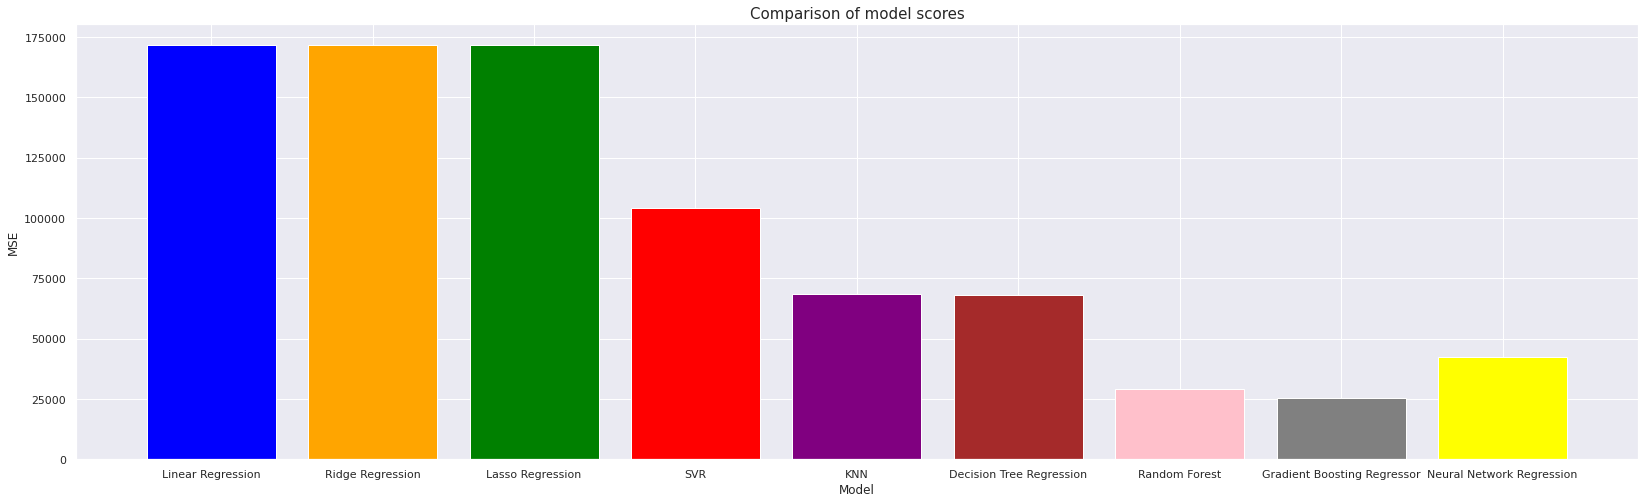

In [ ]:
fig, ax = plt.subplots(figsize=(28,8))
plt.bar(comparison.index, comparison["MSE"], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellow'])
#We add the legends and title 
plt.xlabel("Model", fontsize= 12)
plt.ylabel("MSE", fontsize= 12)
plt.title("Comparison of model scores", fontsize= 15)

The best result is obtained with the gradient boosting regressor model, because its MSE parameter is the lowest

As we can see, the obtained MSE scores are insanely high and not close to 0 as they should. <br>
It is because our dataset contains very versatile and dispersed (features having an extended scale which can vary rapidly from day to day) plus lots of records (and we need all of them to build a model due to disparate values depending on time related link to the weather...as our dataset displays rows each hour) <br><br>
So we decided to base our assessment of the model's performance on the R2 score rather than the MSE score because this evaluation metrics does not suit te pecualarity of our dataset. 

####R2

In [ ]:
r2_models = [r2_linear_reg, r2_ridge_reg, r2_lasso_reg, r2_svm_svr, r2_knn_reg, r2_tree_reg, r2_rf_reg, r2_grad_boosting_reg, r2_neural_network_reg]
comparison2 = pd.DataFrame(r2_models, index = names_models, columns = ["r2"])
comparison2.sort_values(by="r2",ascending=False)

,r2
Gradient Boosting Regressor,0.938093
Random Forest,0.928418
Neural Network Regression,0.895964
Decision Tree Regression,0.833605
KNN,0.832271
SVR,0.745198
Lasso Regression,0.579581
Ridge Regression,0.579422
Linear Regression,0.579387


Text(0.5, 1.0, 'Comparison of model scores')

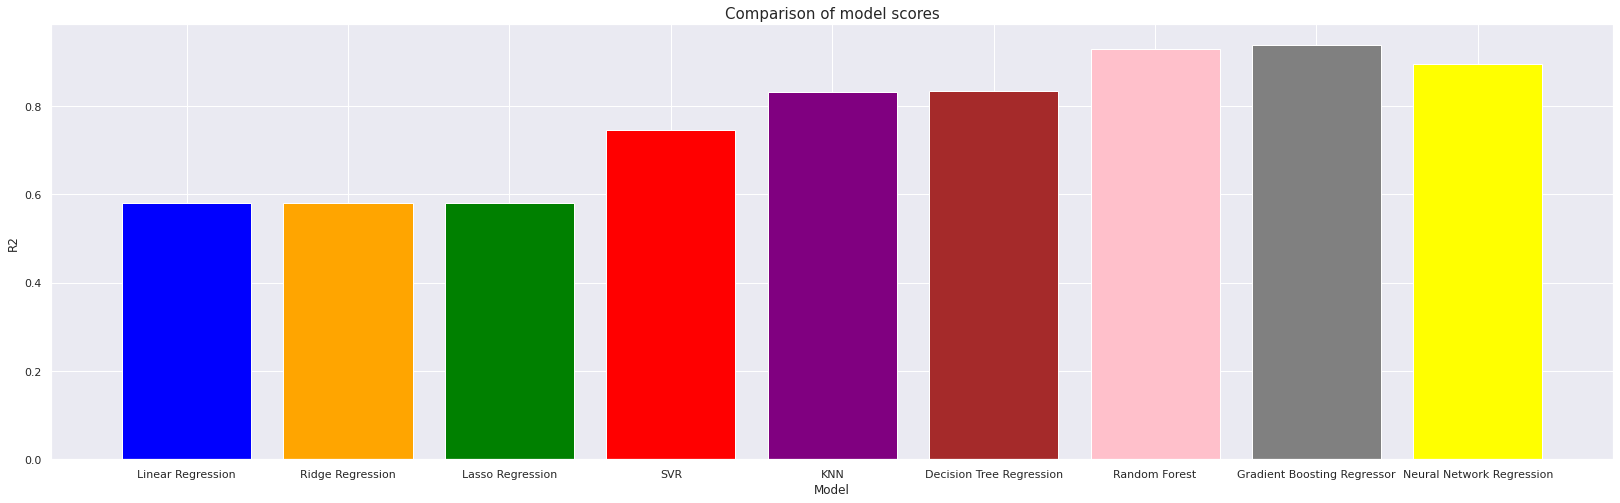

In [ ]:
fig, ax = plt.subplots(figsize=(28,8))
plt.bar(comparison2.index, comparison2["r2"], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey', 'yellow'])
#We add the legends and title 
plt.xlabel("Model", fontsize= 12)
plt.ylabel("R2", fontsize= 12)
plt.title("Comparison of model scores", fontsize= 15)

Again, by looking at the r2 score, the best result is obtained with the gradient boosting regressor model, because the r2 parameter is the closest to 1.

### 7.5 Gradient Boosting Regressor model with all features

In order to try to have a better result, we perform a gradient boosting regressor model with all features.

In [ ]:
# We make a copy of our original dataframe
df_bike2 = df1.copy()

# We delete the Month column and keep the Number_month column
df_bike2 = df_bike2.drop(['Month'], axis=1)

df_bike2.head()

,Date,Bike_Count,Hour,Temp,Hum,Wind,Vis,Dew,Solar,Rain,Snow,Seasons,Holiday,FDay,Day_week,Number_month,Part_of_the_day,Week_end_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Night,no
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Night,no
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Night,no
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Night,no
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Night,no


Binary values for the columns "Holiday" and "FDay"

In [ ]:
df_bike2['Holiday'] = [1 if x=='Holiday' else 0 for x in df_bike2['Holiday']]
df_bike2['FDay'] = [1 if x=='Yes' else 0 for x in df_bike2['FDay']]

Seasons, Day_week, Part_of_the_day and Week_end_day are categorical features. : we convert categorical features into numerical values using the get_dummies function from pandas

In [ ]:
dummies2 = ['Seasons','Day_week','Part_of_the_day','Week_end_day']
dummy_data2 = pd.get_dummies(df_bike2[dummies2])
dummy_data2.shape

(8760, 17)

In [ ]:
# We concat the 2 frames and drop the old columns 
df_bike2 = pd.concat([df_bike2, dummy_data2], axis = 1)
df_bike2.drop(dummies2, axis=1, inplace=True)
df_bike2.head()

,Date,Bike_Count,Hour,Temp,Hum,Wind,Vis,Dew,Solar,Rain,Snow,Holiday,FDay,Number_month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day_week_Friday,Day_week_Monday,Day_week_Saturday,Day_week_Sunday,Day_week_Thursday,Day_week_Tuesday,Day_week_Wednesday,Part_of_the_day_Afternoon,Part_of_the_day_Evening,Part_of_the_day_Morning,Part_of_the_day_Night,Week_end_day_no,Week_end_day_yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0


To avoid raising an error with the DateTime format, we convert this datatype column in numeric

In [ ]:
df_bike2['Date'] = pd.to_numeric(pd.to_datetime(df_bike2['Date']))

Let's check if all values are numeric 

In [ ]:
df_bike2.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Date                         True
Bike_Count                   True
Hour                         True
Temp                         True
Hum                          True
Wind                         True
Vis                          True
Dew                          True
Solar                        True
Rain                         True
Snow                         True
Holiday                      True
FDay                         True
Number_month                 True
Seasons_Autumn               True
Seasons_Spring               True
Seasons_Summer               True
Seasons_Winter               True
Day_week_Friday              True
Day_week_Monday              True
Day_week_Saturday            True
Day_week_Sunday              True
Day_week_Thursday            True
Day_week_Tuesday             True
Day_week_Wednesday           True
Part_of_the_day_Afternoon    True
Part_of_the_day_Evening      True
Part_of_the_day_Morning      True
Part_of_the_day_Night        True
Week_end_day_n

Split the data into a train and a test set

In [ ]:
x, y = df_bike2.loc[:,df_bike2.columns != 'Bike_Count'], df_bike2.loc[:,'Bike_Count']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

Scaling the data

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Model

##### Cross-Validation

In [ ]:
grad_boosting_reg = GradientBoostingRegressor()
parameters = {'n_estimators':[10,100,500],
              'learning_rate':[.001,0.01,.1],
              'max_depth':[1,2,4],
              'subsample':[.5,.75,1]}

grid_search = GridSearchCV(estimator=grad_boosting_reg,
                           param_grid=parameters,
                           cv=5)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.75}

##### Perform the model

In [ ]:
grad_boosting_reg2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=500, subsample=0.75).fit(x_train, y_train)

# Prediction
y_prediction_grad_boosting_reg2 = grad_boosting_reg2.predict(x_test)

# Score
r2_grad_boosting_reg2 = r2_score(y_test, y_prediction_grad_boosting_reg2)
MSE_grad_boosting_reg2 = mean_squared_error(y_test, y_prediction_grad_boosting_reg2)
print("R2 =", r2_grad_boosting_reg2)
print("Mean squared error =", MSE_grad_boosting_reg2)
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test, y_prediction_grad_boosting_reg2)))

R2 = 0.9406712396161091
Mean squared error = 24205.22988672927
Root mean squared error = 155.58030044555534


####Saving the model for predictions with the Flask application

In [ ]:
pickle.dump(grad_boosting_reg2, open('model_grad_boosting_reg.pkl','wb'))

In [ ]:
# We save the dataframe df_bike2
pickle.dump(df_bike2, open('df_bike2.pkl','wb'))

## 8. Flask

###Installation

In [ ]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15984 sha256=dbb575e91181e7d76db7fc0ae6cb8280d0e09e556ea147645afed7f8ed917e85
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [ ]:
!ngrok authtoken 231aDBrawch35gOZZoCIMc5Z8Lb_5nmGDpG4oTEUY1ich83VN

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import pickle
from os import name
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template, redirect, url_for
import datetime
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

###Conversion of information received as input to a dataframe



In [ ]:
import datetime
from datetime import datetime
def Create_dataframe_for_prediction(data):
  
  # Date
  y = data[0][0:4]
  m = data[0][5:7]
  d = data[0][8:10]
  Date = d+'/'+m+'/'+y
  Date

  date = datetime.strptime(Date, "%d/%m/%Y")
  date

  data[0]=date

  # Hour
  if (int(data[1][0])==0): 
    data[1] = int(data[1][1]) 
  else:
    data[1] = int(data[1][0] + data[1][1])
  hour = data[1]

  holiday = 1 if data[2]=="yes" else 0

  functioning_day = 1 if data[3]=="yes" else 0

  temperature = float(data[4])

  humidity = int(data[5])

  windspeed = float(data[6])

  visibility = int(data[7])

  dew_point_temperature = float(data[8])

  solar_radiation = float(data[9])

  rainfall = float(data[10])

  snowfall = float(data[11])

  number_month = date.month


  # To determine the season
  season=''
  # We get the current day of the year
  day_of_the_year = date.timetuple().tm_yday

  spring = range(80, 172)
  summer = range(172, 264)
  autumn = range(264, 355)
  # winter = everything else

  if day_of_the_year in spring:
    season = 'Spring'
  elif day_of_the_year in summer:
    season = 'Summer'
  elif day_of_the_year in autumn:
    season = 'Autumn'
  else:
    season = 'Winter'

  season_winter = 1 if season=="Winter" else 0
  season_spring = 1 if season=="Spring" else 0
  season_summer = 1 if season=="Summer" else 0
  season_autumn = 1 if season=="Autumn" else 0


  # Part of the day : Morning, Afternoon, Evening, Night
  Part_of_the_day = part_of_the_day(int(hour))

  part_of_the_day_morning = 1 if Part_of_the_day=="Morning" else 0
  part_of_the_day_afternoon = 1 if Part_of_the_day=="Afternoon" else 0
  part_of_the_day_evening = 1 if Part_of_the_day=="Evening" else 0
  part_of_the_day_night = 1 if Part_of_the_day=="Night" else 0


  # Week-end day or not
  w_d = date.weekday()
  day=""
  if(w_d==0):
    day="Monday"
  elif(w_d==1):
    day="Tuesday"
  elif(w_d==2):
    day="Wednesday"
  elif(w_d==3):
    day="Thursday"
  elif(w_d==4):
    day="Friday"
  elif(w_d==5):
    day="Saturday"
  elif(w_d==6):
    day="Sunday"

  week_end_day_yes = 1 if (day=="Saturday" or day=="Sunday") else 0
  week_end_day_no = 0 if (day=="Saturday" or day=="Sunday") else 1

  day_week_monday = 1 if day=="Monday" else 0
  day_week_tuesday = 1 if day=="Tuesday" else 0
  day_week_wednesday = 1 if day=="Wednesday" else 0
  day_week_thursday = 1 if day=="Thursday" else 0
  day_week_friday = 1 if day=="Friday" else 0
  day_week_saturday = 1 if day=="Saturday" else 0
  day_week_sunday = 1 if day=="Sunday" else 0

 
  
  columns = [date, hour, temperature, humidity, windspeed, visibility, dew_point_temperature, solar_radiation, rainfall, snowfall, holiday, functioning_day, 
             number_month, season_autumn, season_spring, season_summer, season_winter, day_week_friday, day_week_monday, day_week_saturday, day_week_sunday, 
             day_week_thursday, day_week_tuesday, day_week_wednesday, part_of_the_day_afternoon, part_of_the_day_evening, part_of_the_day_morning, part_of_the_day_night, 
             week_end_day_no, week_end_day_yes]
  
  column_names = ["Date", "Hour", "Temp", "Hum", "Wind", "Vis", "Dew", "Solar", "Rain", "Snow", "Holiday", "FDay", 
                  "Number_month", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter", "Day_week_Friday", "Day_week_Monday", "Day_week_Saturday", "Day_week_Sunday", 
                  "Day_week_Thursday", "Day_week_Tuesday", "Day_week_Wednesday", "Part_of_the_day_Afternoon", "Part_of_the_day_Evening", "Part_of_the_day_Morning", "Part_of_the_day_Night", 
                  "Week_end_day_no", "Week_end_day_yes"]

  df_prediction = pd.DataFrame([columns], columns=column_names)
  df_prediction['Date'] = pd.to_numeric(pd.to_datetime(df_prediction['Date']))

  df_complete = pd.concat([df_bike2, df_prediction], ignore_index = True)

  df_complete.drop(["Bike_Count"], axis = 1, inplace = True)


  X = df_complete
  scaler = StandardScaler()
  scaler.fit(X)
  X_scaled = scaler.transform(X)

  df_pred = np.array(list(X_scaled[8760]), ndmin=2)

  return df_pred


###App

In [ ]:
app = Flask(__name__, template_folder='/content', static_folder='/content/static')

run_with_ngrok(app)

model_grad_boosting_reg = pickle.load(open('/content/model_grad_boosting_reg.pkl', 'rb'))
df_bike2 = pickle.load(open('/content/df_bike2.pkl', 'rb'))

def part_of_the_day(hour):
    if(hour < 6):
        return "Night"
    elif (hour < 12):
        return "Morning"
    elif (hour < 18):
        return "Afternoon"
    else :
          return "Evening"

@app.route('/')
def home():
    return render_template("index_accueil.html")

@app.route('/get_prediction', methods=['POST'])
def get_prediction():    

    input = [x for x in request.form.values()]
    input.append("")

    df_prediction = Create_dataframe_for_prediction(input)

    prediction = model_grad_boosting_reg.predict(df_prediction)

    return render_template("index_accueil.html", output='Predicted Bike Count : {}'.format(prediction))

app.run()

if __name__ == "__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://fafe-35-186-189-191.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [02/Jan/2022 11:30:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jan/2022 11:30:50] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [02/Jan/2022 11:30:50] "GET /static/bike.jpg HTTP/1.1" 200 -
127.0.0.1 - - [02/Jan/2022 11:30:51] "GET /favicon.ico HTTP/1.1" 404 -


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
